<a href="https://colab.research.google.com/github/akashban812/DS-practice/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import os as os
os.chdir('/content/drive/MyDrive/DS notebooks')
os.getcwd()
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [51]:
#@title Default title text
##Importing the data
##Unicode escape in activated to encounter any error arising due to any invalid characters

## Using the 'Online Retail' dataset from Kaggle


rtl_raw_data=pd.read_csv('OnlineRetail.csv',encoding='unicode_escape')



In [52]:
###checking distribution by country
country_cust=rtl_raw_data[['Country','CustomerID']].drop_duplicates()
country_cust_grp= country_cust.groupby(['Country'])['CustomerID'].nunique().reset_index().sort_values(by=['CustomerID'],ascending=[False])
country_cust_grp

##In the next step we'll use only the records for UK as it has the max customers
rtl_raw_UK=rtl_raw_data[rtl_raw_data['Country']=='United Kingdom'].reset_index(drop=True)

In [53]:

##Checking for missng values
rtl_raw_UK.isnull().sum(axis=0)



InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [54]:
##removing missing values for the customerid column
rtl_raw_UK_2=rtl_raw_UK[pd.notnull(rtl_raw_UK['CustomerID'])]

##Validating if there are any negative vales in the Quantity column
rtl_raw_UK_2.Quantity.min()


-80995

In [55]:
##Validating if there are any negative vales in the UnitPrice column
rtl_raw_UK_2.UnitPrice.min()

0.0

In [56]:
##Filtering out negative values from Quantity column
rtl_raw_UK_3=rtl_raw_UK_2[rtl_raw_UK_2['Quantity']>0]

##Converting the date filed to datetime
rtl_raw_UK_3['InvoiceDate']=pd.to_datetime(rtl_raw_UK_3['InvoiceDate'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [57]:
###Calculation of total amt
rtl_raw_UK_3['total_spend']=rtl_raw_UK_3['Quantity']*rtl_raw_UK_3['UnitPrice']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### From this point onwards, we demonstrate RFM modeling using RFM scores


In [58]:
import datetime as dt
### Setting latest date as per dataset
latest_dt=dt.datetime(2011,12,10)

###Creating RFM scores for each customer

rfm_scores= rtl_raw_UK_3.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (latest_dt - x.max()).days,\
                                                      'InvoiceNo': lambda x: len(x), 'total_spend': lambda x: x.sum()}).reset_index()

rfm_scores.rename(columns={'InvoiceDate':'recency','InvoiceNo':'frequency','total_spend':'monetary'},inplace=True)
rfm_scores

,CustomerID,recency,frequency,monetary
0,12346.0,325,1,77183.60
1,12747.0,22,103,4196.01
2,12748.0,4,4596,33719.73
3,12749.0,22,199,4090.88
4,12820.0,44,59,942.34
...,...,...,...,...
3916,18280.0,159,10,180.60
3917,18281.0,3,7,80.82
3918,18282.0,215,12,178.05
3919,18283.0,9,756,2094.88


In [59]:
###Calculating RFM groups

labels_rec = [1,2,3,4]
labels_fm = [4,3,2,1]

rfm_scores['rec_score']=pd.qcut(rfm_scores['recency'],q=[0,0.25,0.5,0.75,1],labels=labels_rec)
rfm_scores['freq_score']=pd.qcut(rfm_scores['frequency'],q=[0,0.25,0.5,0.75,1],labels=labels_fm)
rfm_scores['mon_score']=pd.qcut(rfm_scores['monetary'],q=[0,0.25,0.5,0.75,1],labels=labels_fm)


rfm_scores['rfm_groups']= rfm_scores['rec_score'].astype(str) + rfm_scores['freq_score'].astype(str) + rfm_scores['mon_score'].astype(str)
rfm_scores['rfm_score']= rfm_scores[['rec_score','freq_score','mon_score']].sum(axis=1)




In [60]:
loyalty_level=['Platinum','Gold','Silver','Bronze']

rfm_scores['loyalty']=pd.qcut(rfm_scores['rfm_score'],q=[0,0.25,0.5,0.75,1],labels=loyalty_level)

rfm_scores

### Concludes the RFM scores methodology

,CustomerID,recency,frequency,monetary,rec_score,freq_score,mon_score,rfm_groups,rfm_score,loyalty
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,22,103,4196.01,2,1,1,211,4,Platinum
2,12748.0,4,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,22,199,4090.88,2,1,1,211,4,Platinum
4,12820.0,44,59,942.34,2,2,2,222,6,Gold
...,...,...,...,...,...,...,...,...,...,...
3916,18280.0,159,10,180.60,3,4,4,344,11,Bronze
3917,18281.0,3,7,80.82,1,4,4,144,9,Silver
3918,18282.0,215,12,178.05,4,4,4,444,12,Bronze
3919,18283.0,9,756,2094.88,1,1,1,111,3,Platinum


### From here on we will look at the K-Means methodology for the clustering

In [61]:
### Getting rid of zero and negative values

def handle_zero_values(num):
  if num <= 0:
    return 1
  else:
    return num

rfm_scores['recency'] = [handle_zero_values(x) for x in rfm_scores['recency']]
rfm_scores['frequency'] = [handle_zero_values(x) for x in rfm_scores['frequency']]
rfm_scores['monetary'] = [handle_zero_values(x) for x in rfm_scores['monetary']]
rfm_scores.reset_index()

rfm_log_tf_data = rfm_scores[['recency','frequency','monetary']].apply(np.log,axis=1).round(3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


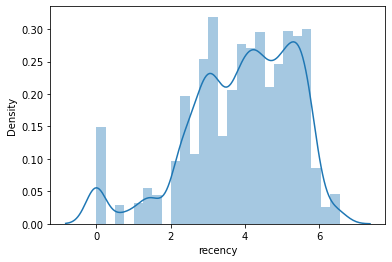

In [62]:
###plotting recency
import seaborn as sns

recency_plot = rfm_log_tf_data['recency']
ax = sns.distplot(recency_plot)

In [63]:
### Scaling the the data
from sklearn.preprocessing import StandardScaler

scaleobj= StandardScaler()

scaled_data=scaleobj.fit_transform(rfm_log_tf_data)

###Transfor back to pandas data frame

scaled_data1= pd.DataFrame(scaled_data,index=rfm_scores.index,columns=rfm_log_tf_data.columns)

from sklearn.cluster import KMeans

### Tryung clusering for various values of k
sum_of_sq_dist={}  ### distance of the sample point from the cenroid of the cluster
for k in range(1,15):

  km = KMeans(n_clusters = k , init='k-means++',max_iter=1000)
  km1= km.fit(scaled_data1)
  sum_of_sq_dist[k]=km1.inertia_



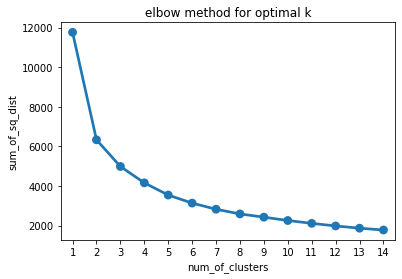

In [64]:
### Now, we will see how to optimize using elbow method to derive the optimal value of q

sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))

plt.xlabel('num_of_clusters')
plt.ylabel('sum_of_sq_dist')
plt.title('elbow method for optimal k')

plt.show()

In [65]:
### Building clusters based on elbow method

kmean_clust= KMeans(n_clusters = 3, init='k-means++',max_iter=1000)
kmean_clust2=kmean_clust.fit(scaled_data1)

###
rfm_scores['cluster']= kmean_clust2.labels_
rfm_scores

,CustomerID,recency,frequency,monetary,rec_score,freq_score,mon_score,rfm_groups,rfm_score,loyalty,cluster
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver,2
1,12747.0,22,103,4196.01,2,1,1,211,4,Platinum,0
2,12748.0,4,4596,33719.73,1,1,1,111,3,Platinum,0
3,12749.0,22,199,4090.88,2,1,1,211,4,Platinum,0
4,12820.0,44,59,942.34,2,2,2,222,6,Gold,2
...,...,...,...,...,...,...,...,...,...,...,...
3916,18280.0,159,10,180.60,3,4,4,344,11,Bronze,1
3917,18281.0,3,7,80.82,1,4,4,144,9,Silver,1
3918,18282.0,215,12,178.05,4,4,4,444,12,Bronze,1
3919,18283.0,9,756,2094.88,1,1,1,111,3,Platinum,0


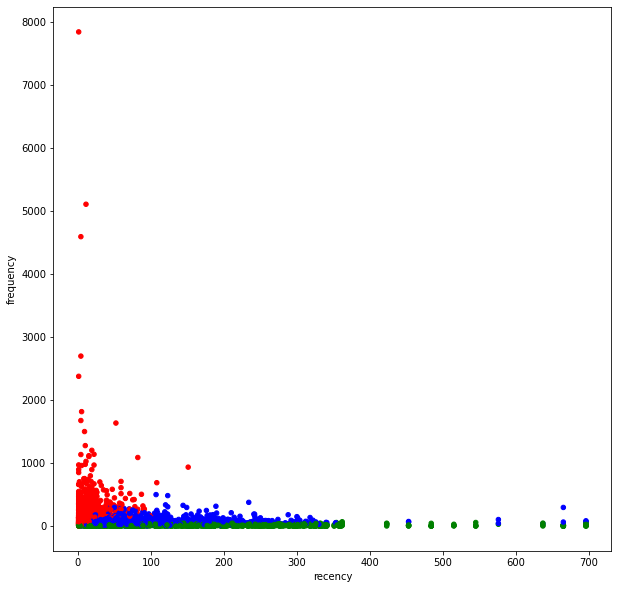

In [66]:
#Plotting the clusters for visualization

from matplotlib import pyplot as plt

## Scatter plot for recency vs frequency

Colors=['red','green','blue']

rfm_scores['color'] = rfm_scores['cluster'].map(lambda p:Colors[p])

ax= rfm_scores.plot(
    kind='scatter',x='recency',y='frequency',figsize=(10,10),c=rfm_scores['color']
)